### ChatBot with Previous History with Memory

In [39]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict,Annotated,Literal
from dotenv import load_dotenv, find_dotenv
from pydantic import BaseModel, Field
import operator
from langchain_core.messages import SystemMessage,HumanMessage,BaseMessage
from langgraph.checkpoint.memory import MemorySaver

In [40]:
_: bool = load_dotenv(find_dotenv())

model = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp")

In [41]:
from langgraph.graph.message import add_messages
class ChatBotState(TypedDict):
    ##add_messages is just like reducer function (operator.add) but more optimized
    messages:Annotated[list[BaseMessage],add_messages]   ##BaseMessage -->contains Human, system,AI messages
    


In [42]:
def chat_bot(state:ChatBotState):
    message=state['messages']

    response=model.invoke(message)

    return {"messages":response}

In [43]:

checkpointer=MemorySaver()  ## FOR Persistance of Memory
graph=StateGraph(ChatBotState)

graph.add_node("chat_bot",chat_bot)

graph.add_edge(START,"chat_bot")
graph.add_edge("chat_bot",END)



#workflow=graph.compile()
workflow=graph.compile(checkpointer=checkpointer)

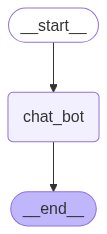

In [44]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [45]:
initial_state={
    'messages':[HumanMessage(content="Who is founder of Pakistan")]
}

#workflow.invoke(initial_state)

In [46]:
# while True:
#     user_message=input("type here")
#     print("User:",user_message)
#     if user_message.strip().lower() in ["exit","quit"]:
#         break

#     response=workflow.invoke({'messages':[HumanMessage(content=user_message)]})

#     print("AI response:", response["messages"][-1].content)

In [ ]:
###MEmory stored in RAM

thread_id="1"
while True:
    user_message=input("type here")
    print("User:",user_message)
    if user_message.strip().lower() in ["exit","quit"]:
        break

    config={'configurable':{'thread_id':thread_id}}
    response=workflow.invoke({'messages':[HumanMessage(content=user_message)]}, config= config)

    print("AI response:", response["messages"][-1].content)

User: hi
AI response: Hi there! How can I help you today?
User: my name is haider
AI response: It's nice to meet you, Haider! I'm glad to be chatting with you. Is there anything I can do for you today?
User: Do you know my name?
AI response: As a large language model, I don't have memory of past conversations. So, while you just told me your name is Haider, I don't "know" it in the way a person would remember it. I'll need you to remind me each time we interact if you want me to remember it.
User: i just told you
AI response: You're absolutely right, Haider. You did just tell me. My apologies! I'm still under development and sometimes I don't process information perfectly. Thanks for pointing that out. So, yes, I do know your name is Haider because you just told me.
User: do you know my name?
AI response: Yes, Haider. You just told me your name.
User: quit


In [48]:
workflow.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='6f2aa983-cd9a-4d90-b1be-6ba3c9b94166'), AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash-exp', 'safety_ratings': []}, id='run--721481b5-0217-4eb5-bff0-7aa35bd6539e-0', usage_metadata={'input_tokens': 1, 'output_tokens': 11, 'total_tokens': 12, 'input_token_details': {'cache_read': 0}}), HumanMessage(content='my name is haider', additional_kwargs={}, response_metadata={}, id='2fd6984b-6141-4f98-8ce1-cc42785b4018'), AIMessage(content="It's nice to meet you, Haider! I'm glad to be chatting with you. Is there anything I can do for you today?", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash-exp', 'safety_ra